<a href="https://colab.research.google.com/github/GabrielBojaca/proyecto-final-control/blob/master/DemandaEnergetica/Demanda%20Energetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DarkSpartan345/Ciencia-de-datos-Energeticos.git

Cloning into 'Ciencia-de-datos-Energeticos'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 128 (delta 51), reused 82 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 20.30 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
%cd /content/Ciencia-de-datos-Energeticos
!git pull

/content/Ciencia-de-datos-Energeticos
Already up to date.


In [ ]:
import pandas as pd
import os
def Carga_datos(archivos,skiprow):
  # Carpeta donde están los archivos

  años = range(2000, 2026)  # Cambia este rango según los años que tengas

  # Lista para almacenar DataFrames
  dataframes = []

  for archivo in archivos:

      try:
          # Leer el archivo (omitiendo las dos primeras filas)
          df = pd.read_excel(archivo, skiprows=skiprow)

          # Guardar en la lista
          dataframes.append(df)

      except FileNotFoundError:
          try:
              # Si no se encuentra el archivo .xlsx, intentar con .xls
              df = pd.read_excel(archivo.replace('.xlsx', '.xls'), skiprows=3)
              dataframes.append(df)
          except FileNotFoundError:
              print(f"Archivo no encontrado: {archivo}")
      except Exception as e:
          print(f"Error leyendo {archivo}: {e}")

  # Concatenar todos los DataFrames
  df_total = pd.concat(dataframes, ignore_index=True)

  return df_total


In [ ]:
archivos=[f"/content/Ciencia-de-datos-Energeticos/DemandaEnergetica/Demanda_Energia/Demanda_Energia_SIN_{año}.xlsx" for año in range(2000,2026)]
df_total=Carga_datos(archivos,3)
DF = df_total.iloc[:, :2]
DF.columns = ['Fecha', 'Demanda Total (kWh)']
DF.head(1000)

,Fecha,Demanda Total (kWh)
0,2000-01-01,8.814187e+07
1,2000-01-02,8.912437e+07
2,2000-01-03,1.061863e+08
3,2000-01-04,1.095546e+08
4,2000-01-05,1.093482e+08
...,...,...
995,2002-09-22,1.101571e+08
996,2002-09-23,1.313407e+08
997,2002-09-24,1.312276e+08
998,2002-09-25,1.297427e+08


In [ ]:
DF['Fecha'] = pd.to_datetime(DF['Fecha'], errors='coerce')
DF = DF.sort_values(by='Fecha')
df_mensual = DF.groupby(pd.Grouper(key='Fecha', freq='ME')).sum(numeric_only=True).reset_index()
df_mensual = df_mensual.iloc[:-1]
df_mensual.head(400)

,Fecha,Demanda Total (kWh)
0,2000-01-31,3.354237e+09
1,2000-02-29,3.278267e+09
2,2000-03-31,3.495203e+09
3,2000-04-30,3.298386e+09
4,2000-05-31,3.502127e+09
...,...,...
301,2025-02-28,6.392576e+09
302,2025-03-31,7.051482e+09
303,2025-04-30,6.762015e+09
304,2025-05-31,7.099986e+09


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_demanda_energetica(df, fecha_col='Fecha', demanda_col='Demanda Total (MWh)', titulo='Demanda energética total - Semestre'):
    """
    Grafica la demanda energética total a lo largo del tiempo.

    Parámetros:
    - df: DataFrame con al menos una columna de fechas y otra con la demanda total
    - fecha_col: nombre de la columna que contiene las fechas
    - demanda_col: nombre de la columna con la demanda total
    - titulo: título del gráfico

    Retorna:
    - None (muestra el gráfico)
    """
    # Asegurar formato datetime para la columna de fecha
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')

    # Ordenar por fecha
    df = df.sort_values(by=fecha_col)

    # Crear figura
    plt.figure(figsize=(12, 6))
    plt.plot(df[fecha_col], df[demanda_col], marker='o', linestyle='-', color='steelblue')

    # Formato del gráfico
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Demanda Total (kWh)')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)

    # Mostrar gráfico
    plt.show()


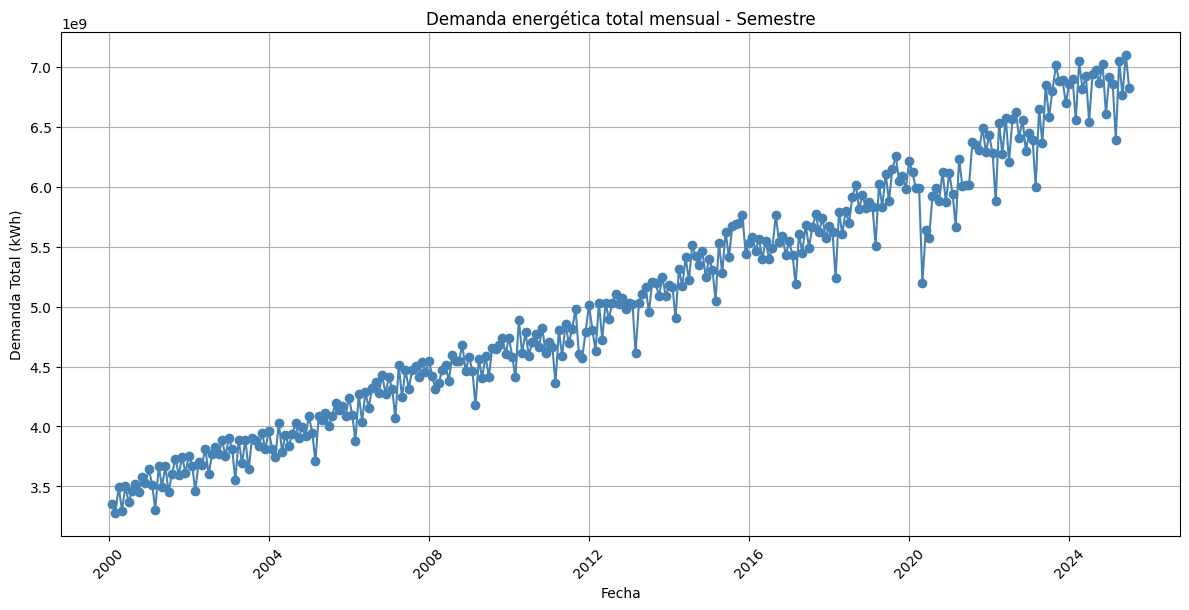

In [ ]:
plot_demanda_energetica(df_mensual,titulo='Demanda energética total mensual - Semestre',demanda_col='Demanda Total (kWh)')

#DATOS DEL CARBON

In [ ]:
archivos=["/content/Ciencia-de-datos-Energeticos/DemandaEnergetica/Carbon_termico/Carbón Termico.xlsx","/content/Ciencia-de-datos-Energeticos/DemandaEnergetica/Carbon_termico/Carbón Termico (2).xlsx"]
df_total_Carbon=Carga_datos(archivos,1)
df_total_Carbon.rename(columns={'Unnamed: 0': 'Fecha_Fin',
                                'Unnamed: 1': 'Fecha_Inicio',
                                'Unnamed: 2': 'Cantidad',
                                'Unnamed: 3': 'TON',
                                'Unnamed: 4': 'Lugar'}, inplace=True)
df_total_Carbon['Fecha_Fin'] = df_total_Carbon['Fecha_Fin'].astype(str)
df_total_Carbon.head(100)

,Fecha_Fin,Fecha_Inicio,Cantidad,TON,Lugar,1994 T4,1995 T4,1996 T4,1997 T4,1998 T4,...,2020 T4,2021 T1,2021 T2,2021 T3,2021 T4,2022 T1,2022 T2,2022 T3,2022 T4,2023 T1
0,1995-12-31 00:00:00,1994-10-25 00:00:00,1962,TON,Carbón térmico de la Guajira mayor de 3 Mt,10000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-12-31 00:00:00,1994-10-25 00:00:00,1962,TON,Carbón térmico de la Guajira menor de 3 Mt,10000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-12-31 00:00:00,1994-10-25 00:00:00,1962,TON,Carbón térmico del Cesar Sector de la Jagua de...,10000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-12-31 00:00:00,1994-10-25 00:00:00,1962,TON,Carbón térmico del Cesar Sector de la Jagua de...,10000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-12-31 00:00:00,1994-10-25 00:00:00,1962,TON,Carbón térmico del Cesar Sector el Descanso ma...,10000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30/6/2001 0:00:00,1/1/2001 0:00:00,267,TON,Carbón Zona Santanderes térmico menor de 3 Mt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,31/12/2001 0:00:00,1/7/2001 0:00:00,136,TON,Carbón térmico de la Guajira mayor de 3 Mt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,31/12/2001 0:00:00,1/7/2001 0:00:00,136,TON,Carbón térmico de la Guajira menor de 3 Mt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,31/12/2001 0:00:00,1/7/2001 0:00:00,136,TON,Carbón térmico del Cesar Sector de la Jagua de...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columnas_trimestre = df_total_Carbon.iloc[:, 5:]
columnas_trimestre.head(100)

,1994 T4,1995 T4,1996 T4,1997 T4,1998 T4,2000 T1,2000 T2,2000 T4,2001 T2,2001 T4,...,2020 T4,2021 T1,2021 T2,2021 T3,2021 T4,2022 T1,2022 T2,2022 T3,2022 T4,2023 T1
0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40157.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36421.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36421.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36421.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
promedio_columnas=columnas_trimestre.mean().to_frame().T
promedio_columnas.head(100)

,1994 T4,1995 T4,1996 T4,1997 T4,1998 T4,2000 T1,2000 T2,2000 T4,2001 T2,2001 T4,...,2020 T4,2021 T1,2021 T2,2021 T3,2021 T4,2022 T1,2022 T2,2022 T3,2022 T4,2023 T1
0,10000.0,11700.0,13690.0,15880.0,15880.0,18602.95,19320.29,40157.0,33528.833333,33528.833333,...,100888.507692,77364.657692,111681.016154,154051.412308,293951.286154,460691.441538,610702.546923,988235.090769,1.333665e+06,1.236175e+06


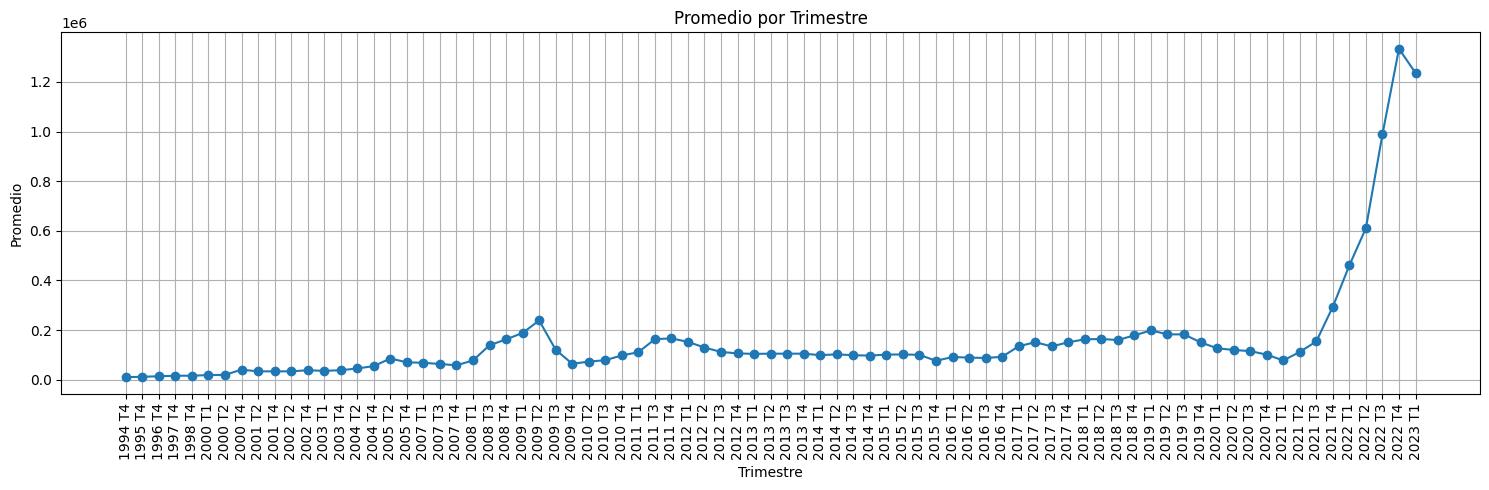

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de extraer los datos correctamente
x_labels = promedio_columnas.columns  # etiquetas: '1994 T4', '1995 T4', ...
y_values = promedio_columnas.iloc[0].values  # valores de la fila 0

# Crear el gráfico
plt.figure(figsize=(15, 5))
plt.plot(x_labels, y_values, marker='o', linestyle='-')
plt.xticks(rotation=90)  # rotar para que se vean mejor
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.title('Promedio por Trimestre')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
pip install pydataxm

In [30]:
# 1. Importación de librerías
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM
import pandas as pd
import matplotlib.pyplot as plt

# 2. Cargar el catálogo y buscar el dataset
catalogo = CatalogSIMEM('Datasets')
data_catalogo = catalogo.get_data()

# 3. Filtrar por nombre del conjunto de datos deseado
filtro = data_catalogo["nombreConjuntoDatos"].str.contains("(?=.*Precio)(?=.*contratos)", case=False, na=False)
resultado = data_catalogo[["nombreConjuntoDatos", "idDataset"]][filtro]
dataset_id = resultado.iloc[0]['idDataset']  # 'E60CE2'

# 4. Definir rango de fechas y descargar datos
fecha_inicio = '2024-08-01'
fecha_fin    = '2025-07-24'

dataset_id = "bb4a0a"
consulta = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)
df = consulta.main(filter=False)



****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precios y estadísticas mensuales de contratos entre agentes"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007576942443847656
Extraccion de registros: 2.8107314109802246
End of data extracting process
****************************************************************************************************


In [31]:
df

,Fecha,CodigoDuracion,PrecioMinimo,Percentil5,PPP,PPS,Mediana,Percentil95,PrecioMaximo,LimiteInferiorIC95Ponderado,LimiteSuperiorIC95Ponderado,LimiteInferiorIC95Simple,LimiteSuperiorIC95Simple,TotalContratos,Version
0,2025-06-01,P1M,76.76,188.60,283.35,309.12,304.11,420.97,841.37,279.06,287.65,303.90,314.34,706,TXR
1,2025-06-01,P1M,77.71,188.60,283.31,309.42,304.11,420.97,841.40,279.02,287.61,304.24,314.60,705,TXF
2,2025-05-01,P1M,1.00,200.01,291.45,315.02,307.97,432.92,1038.87,287.07,295.84,309.76,320.29,701,TX2
3,2025-05-01,P1M,79.01,188.60,285.49,310.77,304.53,428.12,1045.01,280.98,290.01,305.49,316.05,701,TXF
4,2025-05-01,P1M,80.00,188.60,288.34,313.89,307.95,432.92,1046.22,283.77,292.90,308.54,319.24,701,TXR
5,2025-04-01,P1M,80.00,188.60,288.00,313.85,306.89,432.92,950.08,283.42,292.59,308.45,319.26,665,TX3
6,2025-04-01,P1M,80.00,188.60,287.83,313.66,306.60,432.50,950.08,283.26,292.40,308.27,319.05,665,TXR
7,2025-04-01,P1M,80.00,188.60,288.00,313.85,306.89,432.92,950.08,283.42,292.59,308.45,319.26,665,TXF
8,2025-04-01,P1M,80.00,188.60,288.03,313.91,306.89,432.92,950.25,283.44,292.61,308.51,319.31,665,TX4
9,2025-03-01,P1M,80.00,210.47,290.63,316.56,306.63,432.63,960.09,286.37,294.90,311.48,321.65,645,TXF


In [32]:
# 5. Conversión de fechas y creación de columnas auxiliares
df['FechaHora'] = pd.to_datetime(df['Fecha'])
df['anio'] = df['FechaHora'].dt.year
df['mes'] = df['FechaHora'].dt.month
df['hora'] = df['FechaHora'].dt.hour
df['anio_mes'] = df['FechaHora'].dt.to_period("M").astype(str)